# Corona Analysis

## Update local repository

In [65]:
import subprocess
import os

os.chdir("COVID-19")
output = subprocess.check_output(["git", "pull", "--rebase"])
os.chdir("..")

for line in output.splitlines():
    print(line.decode('utf-8'))

Already up to date.
Current branch master is up to date.


## Check current data

Check the paths and list the files

In [69]:
from os import listdir

coronaRepositoryPath = 'COVID-19'
coronaDataPath = coronaRepositoryPath + '/' + 'csse_covid_19_data'
coronaTimeSeries = coronaDataPath + '/' + 'csse_covid_19_time_series'
coronaDailyReports = coronaDataPath + '/' +'csse_covid_19_daily_reports'

def ls(path):
    print("> ls " + path)
    for line in listdir(path):
        print(line)
    print("\n")
        
ls(coronaRepositoryPath)
ls(coronaDataPath)
ls(coronaTimeSeries)

lsDailyReports = listdir(coronaDailyReports)
lsDailyReports.sort()

csvFiles = list(filter(lambda i: 'csv' in i,lsDailyReports))

print("newest .csv file = " + csvFiles[-1])

> ls COVID-19
README.md
.gitignore
who_covid_19_situation_reports
csse_covid_19_data
archived_data
.git


> ls COVID-19/csse_covid_19_data
csse_covid_19_time_series
README.md
csse_covid_19_daily_reports


> ls COVID-19/csse_covid_19_data/csse_covid_19_time_series
time_series_covid19_confirmed_global.csv
time_series_covid19_recovered_global.csv
README.md
.gitignore
time_series_covid19_deaths_global.csv


newest .csv file = 03-28-2020.csv


## Read data of newest report

Quick look at the current day

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt

plt.close('all')

file = coronaDailyReports + '/' + csvFiles[-1]
dataNew = pd.read_csv(file)

In [11]:
dataGermanyNew = dataNew[dataNew.Country_Region.eq('Germany')]
dataGermanyNew.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3317,NaN,NaN,NaN,Germany,2020-03-28 23:05:25,51.165691,10.451526,57695,433,8481,48781,Germany


## Germany over time

Normalize the input data and store it in data frame

In [13]:
dataGermany = pd.DataFrame(columns=["Date", "Confirmed", "Deaths", "Recovered"])
dataGermanyNoDate = pd.DataFrame(columns=["Confirmed", "Deaths", "Recovered"])

for file in csvFiles:
        dataDay = pd.read_csv(coronaDailyReports + '/' + file)
        if 'Country_Region' not in dataDay.columns:
            dataDay.rename(columns={"Country/Region": "Country_Region"}, inplace=True)
        dataGermanyDay = dataDay[dataDay['Country_Region'].eq('Germany')]
        
        if dataGermanyDay.shape[0] > 0: # non-empty rows
            dataGermanyDay = dataGermanyDay.fillna(0)
            
            recovered = int(float(dataGermanyDay.Recovered.to_string(index=False)))
            deaths = int(float(dataGermanyDay.Deaths.to_string(index=False)))
            confirmed = int(float(dataGermanyDay.Confirmed.to_string(index=False)))

            dataGermany = dataGermany.append({'Date': file.strip('.csv'),
                                              'Confirmed': confirmed, 
                                              'Deaths': deaths, 
                                              'Recovered': recovered}, 
                                             ignore_index=True)
            pd.to_datetime(dataGermany['Date'])
                
            
            dataGermanyNoDate = dataGermanyNoDate.append({'Confirmed': confirmed, 
                                                          'Deaths': deaths, 
                                                          'Recovered': recovered}, 
                                                         ignore_index=True)
        
dataGermany.tail(5)

,Date,Confirmed,Deaths,Recovered
56,03-24-2020,32986.0,157.0,3243.0
57,03-25-2020,37323.0,206.0,3547.0
58,03-26-2020,43938.0,267.0,5673.0
59,03-27-2020,50871.0,342.0,6658.0
60,03-28-2020,57695.0,433.0,8481.0


#### Create diff data frame

In [ ]:
dataGermanyNoDateDiff = dataGermanyNoDate.diff()
dataGermanyNoDateDiff = dataGermanyNoDateDiff.fillna(0)

## Plot the results

### Last N days

In [90]:
days = 5
lastNDays = dataGermanyNoDateDiff.tail(days)

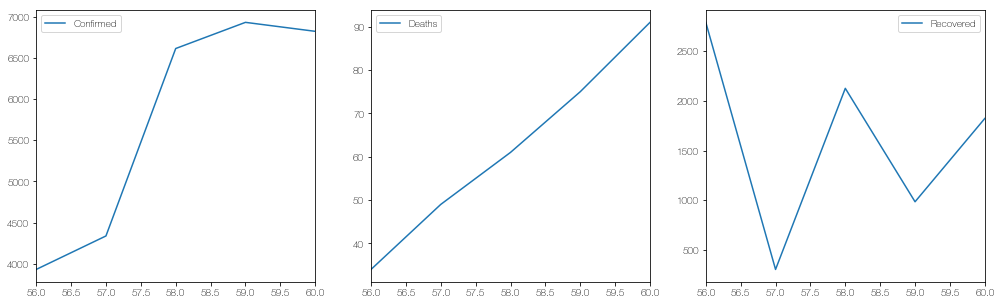

In [91]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1,3, figsize=(17,5))
lastNDays.plot(y='Confirmed', ax=ax1)
lastNDays.plot(y='Deaths', ax=ax2)
lastNDays.plot(y='Recovered', ax=ax3)

plt.show()

### Total numbers

#### Plot helper function

In [ ]:
def plotData(column):
    fig, ((ax1, ax2),((ax3,ax4))) = plt.subplots(2,2, figsize=(15,10))

    dataGermany.plot(fontsize=11, title= column + " total log scale", x='Date', y=column, ax=ax1, logy=True)
    dataGermanyNoDateDiff.plot(fontsize=11, title= column + " diff log scale", y=column, ax=ax2, logy=True)

    dataGermany.plot(fontsize=11, title= column + " total", x='Date', y=column, ax=ax3)
    dataGermanyNoDateDiff.plot(fontsize=11, title= column + " diff", y=column, ax=ax4)

    plt.show()

#### Confirmed

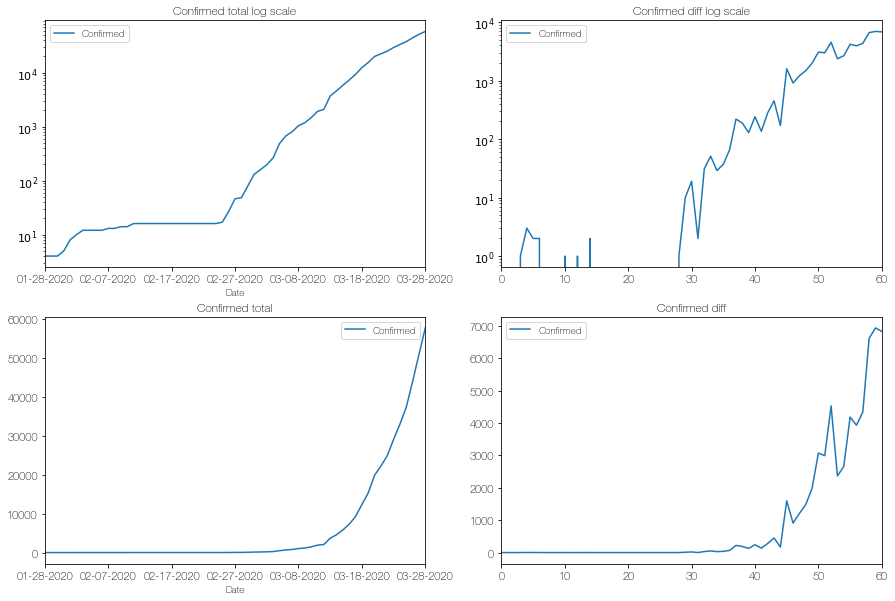

In [30]:
plotData('Confirmed')

#### Deaths

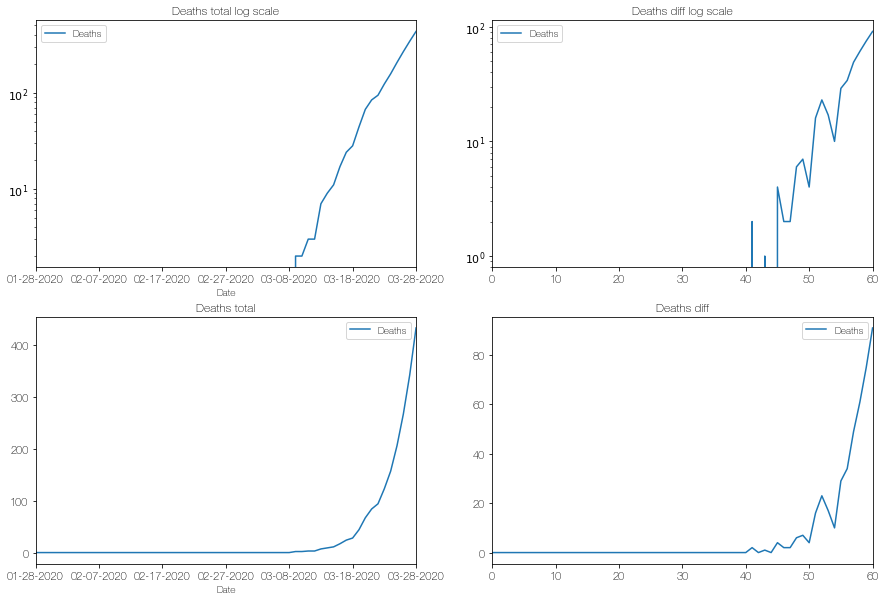

In [31]:
plotData('Deaths')

#### Recovered

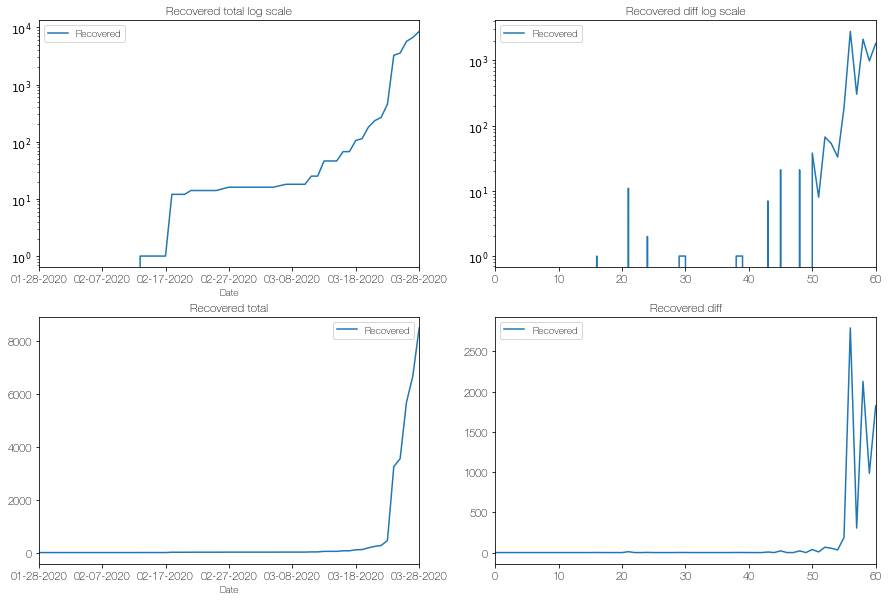

In [32]:
plotData('Recovered')